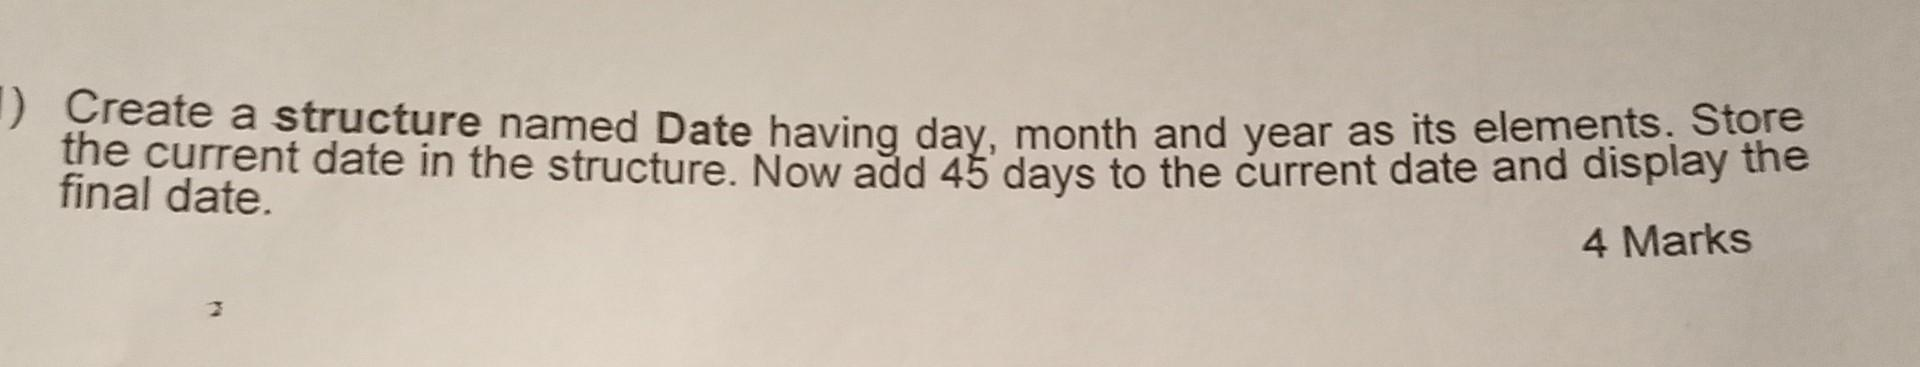

In [ ]:
// Importing the libraries
#include <iostream>
#include <limits>
using namespace std;


// checking whether the year is leap year or not
bool whether_leap_year(int year)
{
    // return is the year is leap year
    return (
        ((year % 4 == 0) && (year % 100 != 0)) ||
        (year % 400 == 0)
    );
}


// checking for dates in every month
int days_of_months(int month, int year)
{
    // condition for february
    if (month == 2)
        // if the year is leap year , february month have 29 days or it will have 28 days.
        return whether_leap_year(year) ? 29 : 28;
    // condition for months having 30 days and 31 days
    else if (month == 4 || month == 6 || month == 9 || month == 11)
        return 30;
    else
        return 31;
}


// Declaring the structure as Date with elements such as day, month and year.
struct Date {
    // Elements of structure
    int day;
    int month;
    int year;

    // Conditions for date
    Date& operator+=(int days)
    {
       // subtracting the days if exceeds.
        int d = day + days;
        int end_day = days_of_months(month, year);
        while (d > end_day)
        {
            d -= end_day;
            // if month is more than we have to increment the year
            if (++month == 13)
            {
                ++year;
                // month as to start from 1st for every month
                month = 1;
            }
            // getting the number of days.
            end_day = days_of_months(month, year);
        }
        day = d;
        return *this;
    }
};


// Declaring the istream 
istream& operator>>(istream &in, Date &d)
{
    // condition for getting the data and month in range
    if (in >> d.day >> d.month >> d.year)
    {
        // month should in between 1 and 12
        if (d.month < 1 || d.month > 12 ||
            d.day < 1 || d.day > days_of_months(d.month, d.year))
        {
            in.setstate(ios_base::failbit);
        }
    }
    return in;
}


// Declaring the main function
int main() {
    
    // Declaring the structure variable
    Date struct_date_var;

    cout << "Enter the Day, Month, and Year (in the format: xx xx xxxx)" << endl;
    // while loop for getting the correct 
    while (!(cin >> struct_date_var))
    {
        cout << "Please Enter the Correct Date!: " << endl;
        cin.clear();
        cin.ignore(numeric_limits<streamsize>::max(), '\n');
        cout << "Enter the Day, Month, and Year (in the format: xx xx xxxx)" << endl;
    }

    // adding 45 for the date 
    struct_date_var += 45;
    
    // printing the output
    cout << "The date after adding 45 days is " << struct_date_var.day << "/" << struct_date_var.month << "/" << struct_date_var.year;
}